In [10]:
import pandas as pd

In [11]:
df = pd.read_csv('trained_models/reinforcement_learning/1590579471.1575735/progress.txt', sep='\t').set_index('Epoch')

In [12]:
df.sample()

,AverageEpRet,StdEpRet,MaxEpRet,MinEpRet,EpLen,AverageVVals,StdVVals,MaxVVals,MinVVals,TotalEnvInteracts,LossPi,LossV,DeltaLossPi,DeltaLossV,Entropy,KL,ClipFrac,StopIter,Time
Epoch,,,,,,,,,,,,,,,,,,,
60,-93.666664,5.934832,-76.0,-100.0,205.6875,-35.25513,16.080317,9.396535,-70.69557,610000,-1.055499e-08,110.51492,-0.022056,-24.979103,2.491875,0.015032,0.137014,19.0,1487.442762


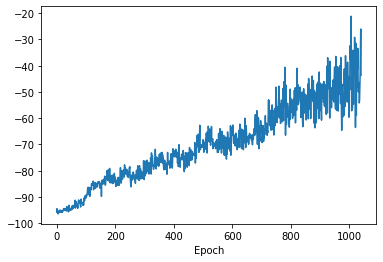

In [13]:
_ = df.AverageEpRet.plot()

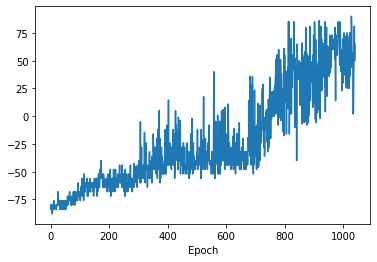

In [14]:
_ = df.MaxEpRet.plot()

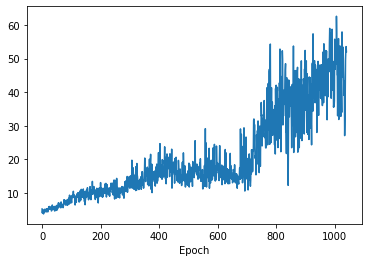

In [15]:
df.StdEpRet.plot()

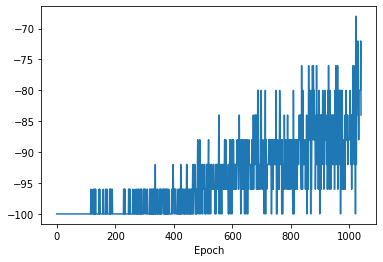

In [16]:
df.MinEpRet.plot()

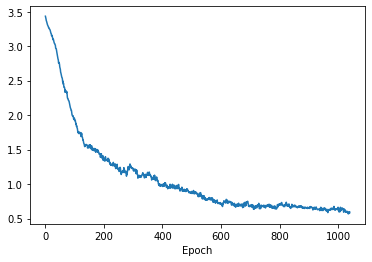

In [17]:
df.Entropy.plot()

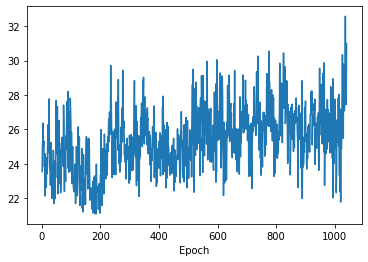

In [18]:
df.Time.diff(1).plot()